## Notebook for the Reference Map preparation

- **Developed by**: Anna Maguza
- **Institute of Computational Biology - Computational Health Centre - Helmholtz Munich**
- 15th February 2023

### Import required moduls

In [1]:
import scanpy as sc

In [2]:
import numpy as np
import anndata as ad
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from geosketch import gs


#### Setup Cells

In [3]:
%matplotlib inline

In [4]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi = 160, color_map = 'magma_r', dpi_save = 300, vector_friendly = True)

/home/icb/anna.maguza/miniconda3/envs/geosketch_env2/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


scanpy==1.9.1 anndata==0.8.0 umap==0.5.3 numpy==1.23.5 scipy==1.10.0 pandas==1.5.3 scikit-learn==1.2.1 statsmodels==0.13.5 pynndescent==0.5.8


### Upload data

In [5]:
# Downloading the data
input = '/lustre/groups/talaveralopez/workspace/anna.maguza/Processed_datasets/expi_map/Reference_map_(Gut_cell_atlas+Smilie+Wang).h5ad'
output = '/lustre/groups/talaveralopez/workspace/anna.maguza/Processed_datasets/expi_map/Reference_map_(Gut_cell_atlas+Smilie+Wang)_output.h5ad'

In [6]:
#Anndata upload
anndata = sc.read_h5ad(input)
anndata.X

<375293x40144 sparse matrix of type '<class 'numpy.float32'>'
	with 649526885 stored elements in Compressed Sparse Row format>

### Step 1 - create a proportion graph for cell types

In [7]:
anndata.obs

,UniqueCell_ID,Sample_ID,CellType,Study_name,Diagnosis,Age,Region code,Fraction,Gender,10X,...,doublet_scores,predicted_doublets,Age_group,Integrated_05,total_counts_ribo,Location,n_counts,percent_mito,percent_ribo,Subject
cell_id,,,,,,,,,,,,,,,,,,,,,
AACACGTTCTTGCATT_Ileum-1_Stem Cell,AACACGTTCTTGCATT_Ileum-1_Stem Cell,Ileum-1,Stem Cell,Wang,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
AACCGCGCATGAAGTA_Ileum-1_Stem Cell,AACCGCGCATGAAGTA_Ileum-1_Stem Cell,Ileum-1,Stem Cell,Wang,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
AACTCAGAGCGATCCC_Ileum-1_Stem Cell,AACTCAGAGCGATCCC_Ileum-1_Stem Cell,Ileum-1,Stem Cell,Wang,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
AACTCCCTCTCAACTT_Ileum-1_Stem Cell,AACTCCCTCTCAACTT_Ileum-1_Stem Cell,Ileum-1,Stem Cell,Wang,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
AACTCTTAGCTTCGCG_Ileum-1_Stem Cell,AACTCTTAGCTTCGCG_Ileum-1_Stem Cell,Ileum-1,Stem Cell,Wang,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
N110.LPA.TCGGGACGTCAACTGT,nan,N110.LPA,Stem Cell,Smilie,Non-inflamed,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,LP,4384,nan,nan,N110
N110.LPA.TGAGCATTCCAGTAGT,nan,N110.LPA,Stem Cell,Smilie,Non-inflamed,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,LP,15655,nan,nan,N110
N110.LPA.TGGCCAGAGAGGACGG,nan,N110.LPA,Stem Cell,Smilie,Non-inflamed,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,LP,26921,nan,nan,N110


<BarContainer object of 10 artists>

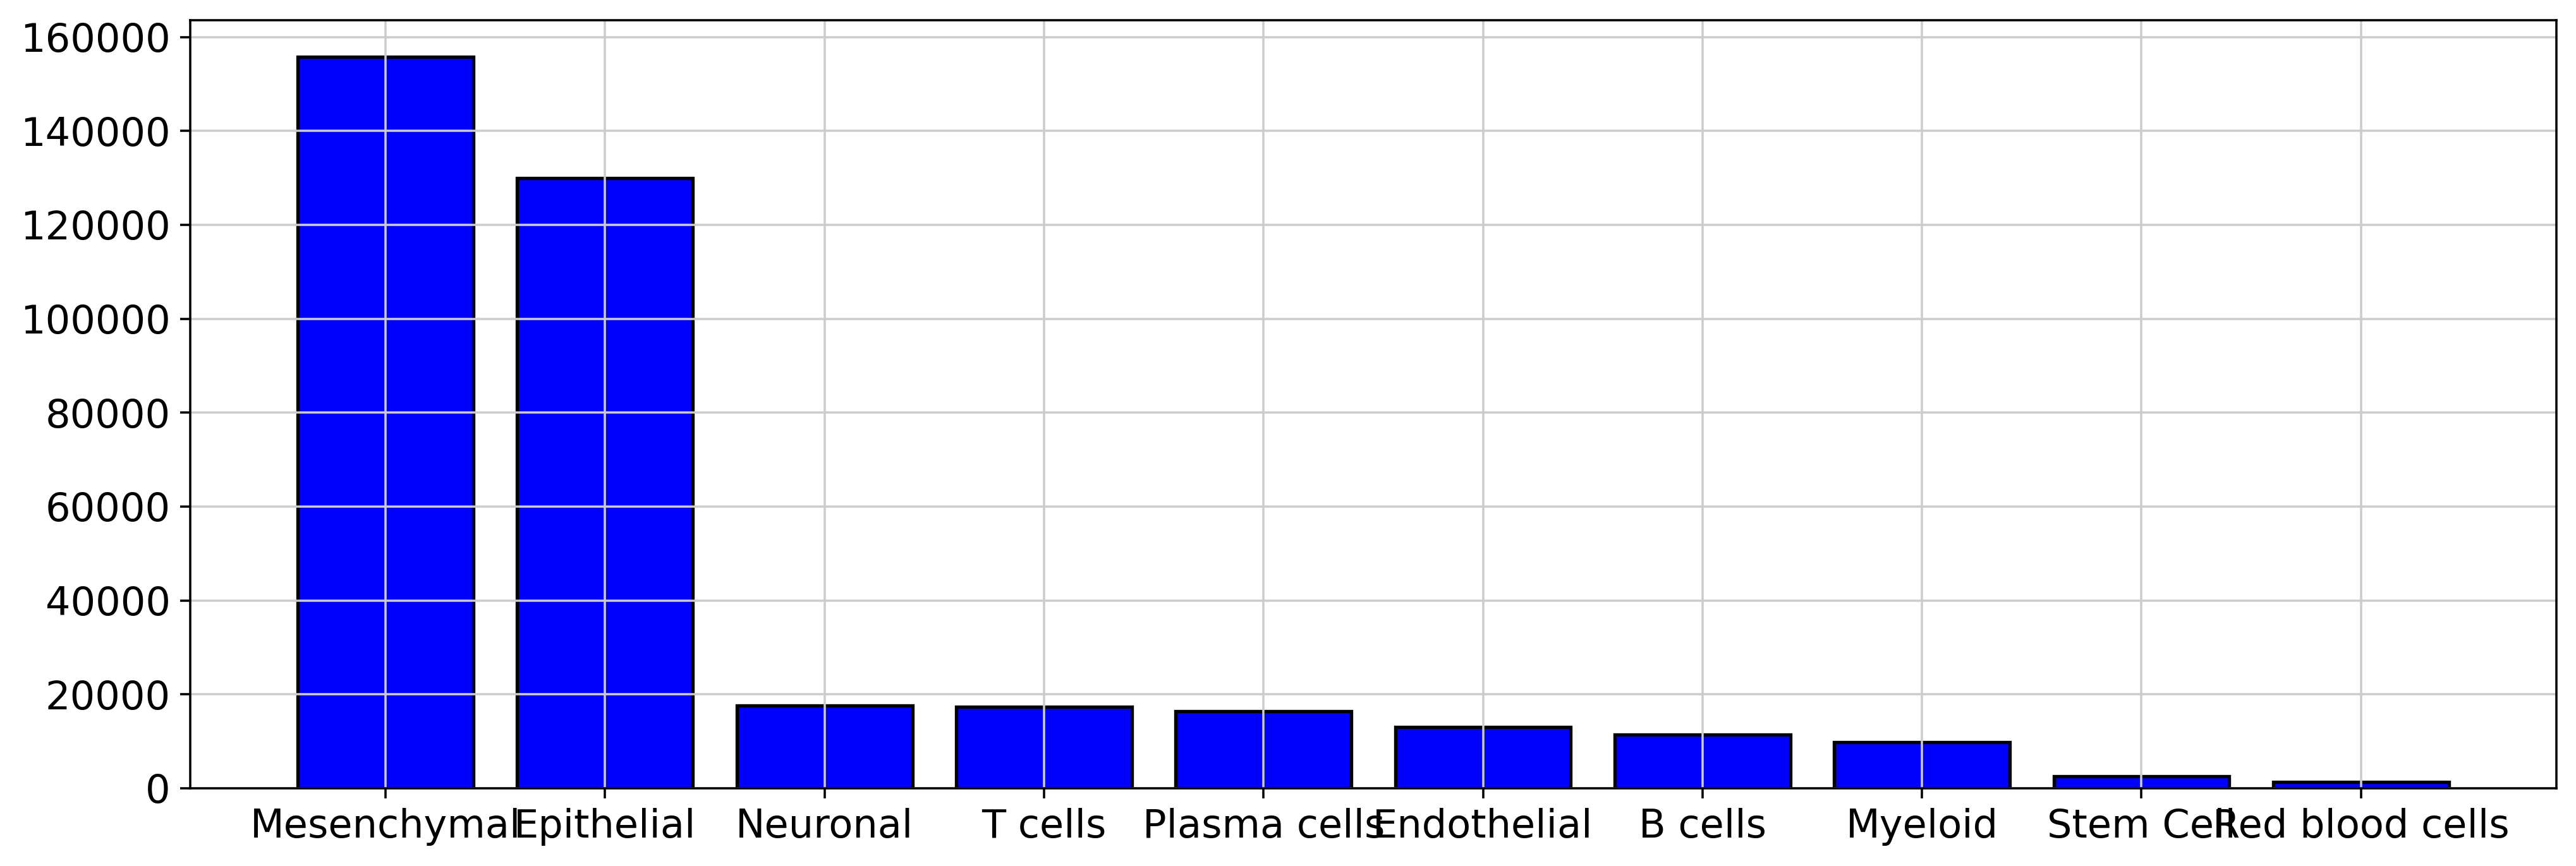

In [8]:
# Create a histogram of the number of cells per cell type in the anndata object, add labels 
plt.figure(figsize = (15, 5))
plt.bar(anndata.obs["CellType"].value_counts().index, anndata.obs["CellType"].value_counts(), color = "blue", edgecolor = "black", linewidth = 1.2)

In [9]:
anndata.obs['Diagnosis'].value_counts()

fetal                231646
Healthy adult        111874
Pediatric healthy     29265
Non-inflamed           1030
Healthy                 818
nan                     660
Name: Diagnosis, dtype: int64

In [7]:
#Rename 'nan' in 'Diagnosis' column to 'healthy'
anndata.obs['Diagnosis'] = anndata.obs['Diagnosis'].replace('nan', 'Healthy adult')
anndata.obs['Diagnosis'] = anndata.obs['Diagnosis'].replace('Healthy', 'Healthy adult')

In [8]:
#Extract only fetal data 
anndata_fetal = anndata[anndata.obs['Diagnosis'] == 'fetal']

In [9]:
#Extract only pediatric data
anndata_pediatric = anndata[anndata.obs['Diagnosis'] == 'Pediatric healthy']

In [10]:
#Extract Healthy adult and non-inflamed data in anndata_adult object
diagnoses_to_keep = ["Non-inflamed", "Healthy adult"]
anndata_adult = anndata.obs['Diagnosis'].isin(diagnoses_to_keep)
anndata_adult = anndata[anndata_adult, :].copy()

In [11]:
anndata_adult.obs['Diagnosis'].value_counts()

Healthy adult    113352
Non-inflamed       1030
Name: Diagnosis, dtype: int64

<BarContainer object of 9 artists>

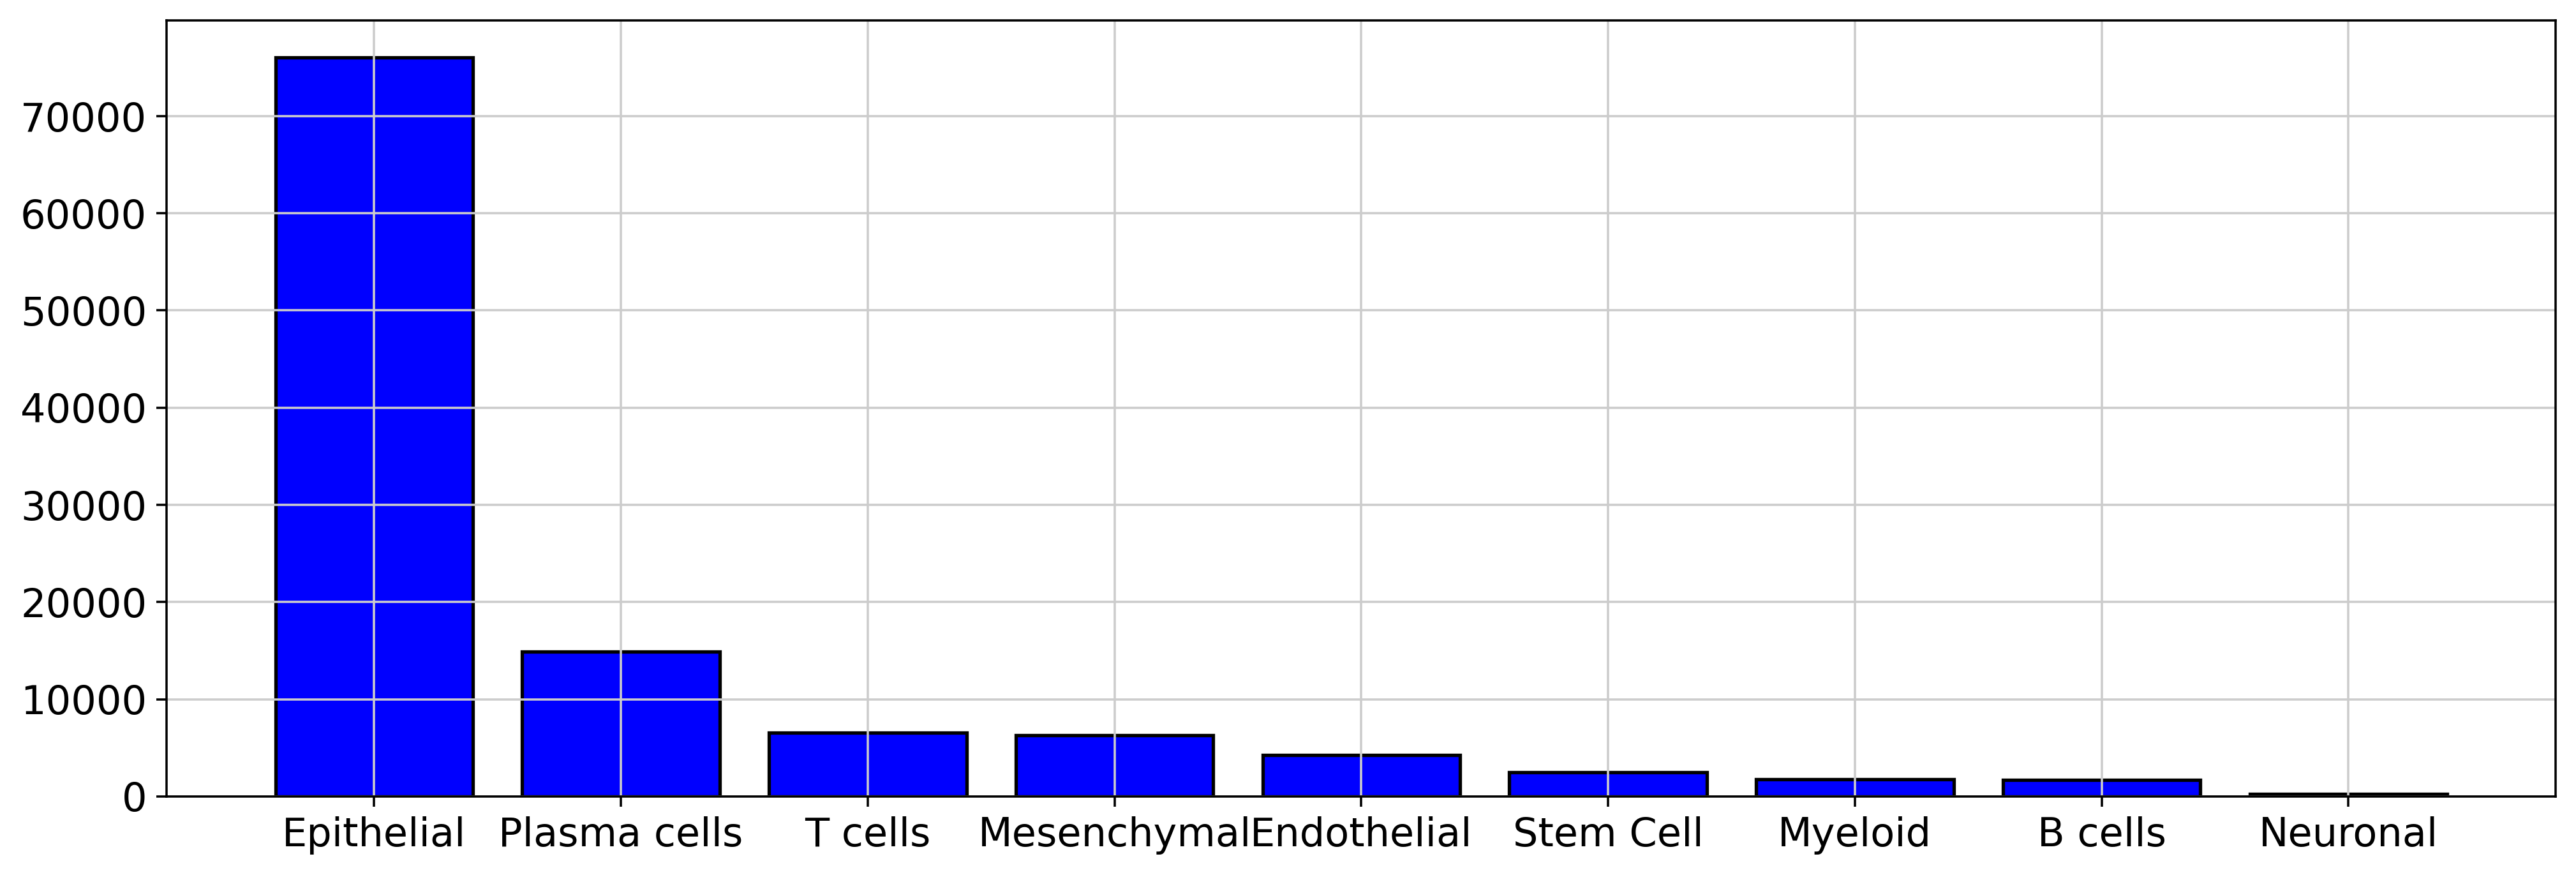

In [15]:
#Create a barplot of the number of cells per cell type in the anndata_adult object
plt.figure(figsize = (15, 5))
plt.bar(anndata_adult.obs["CellType"].value_counts().index, anndata_adult.obs["CellType"].value_counts(), color = "blue", edgecolor = "black", linewidth = 1.2)

<BarContainer object of 8 artists>

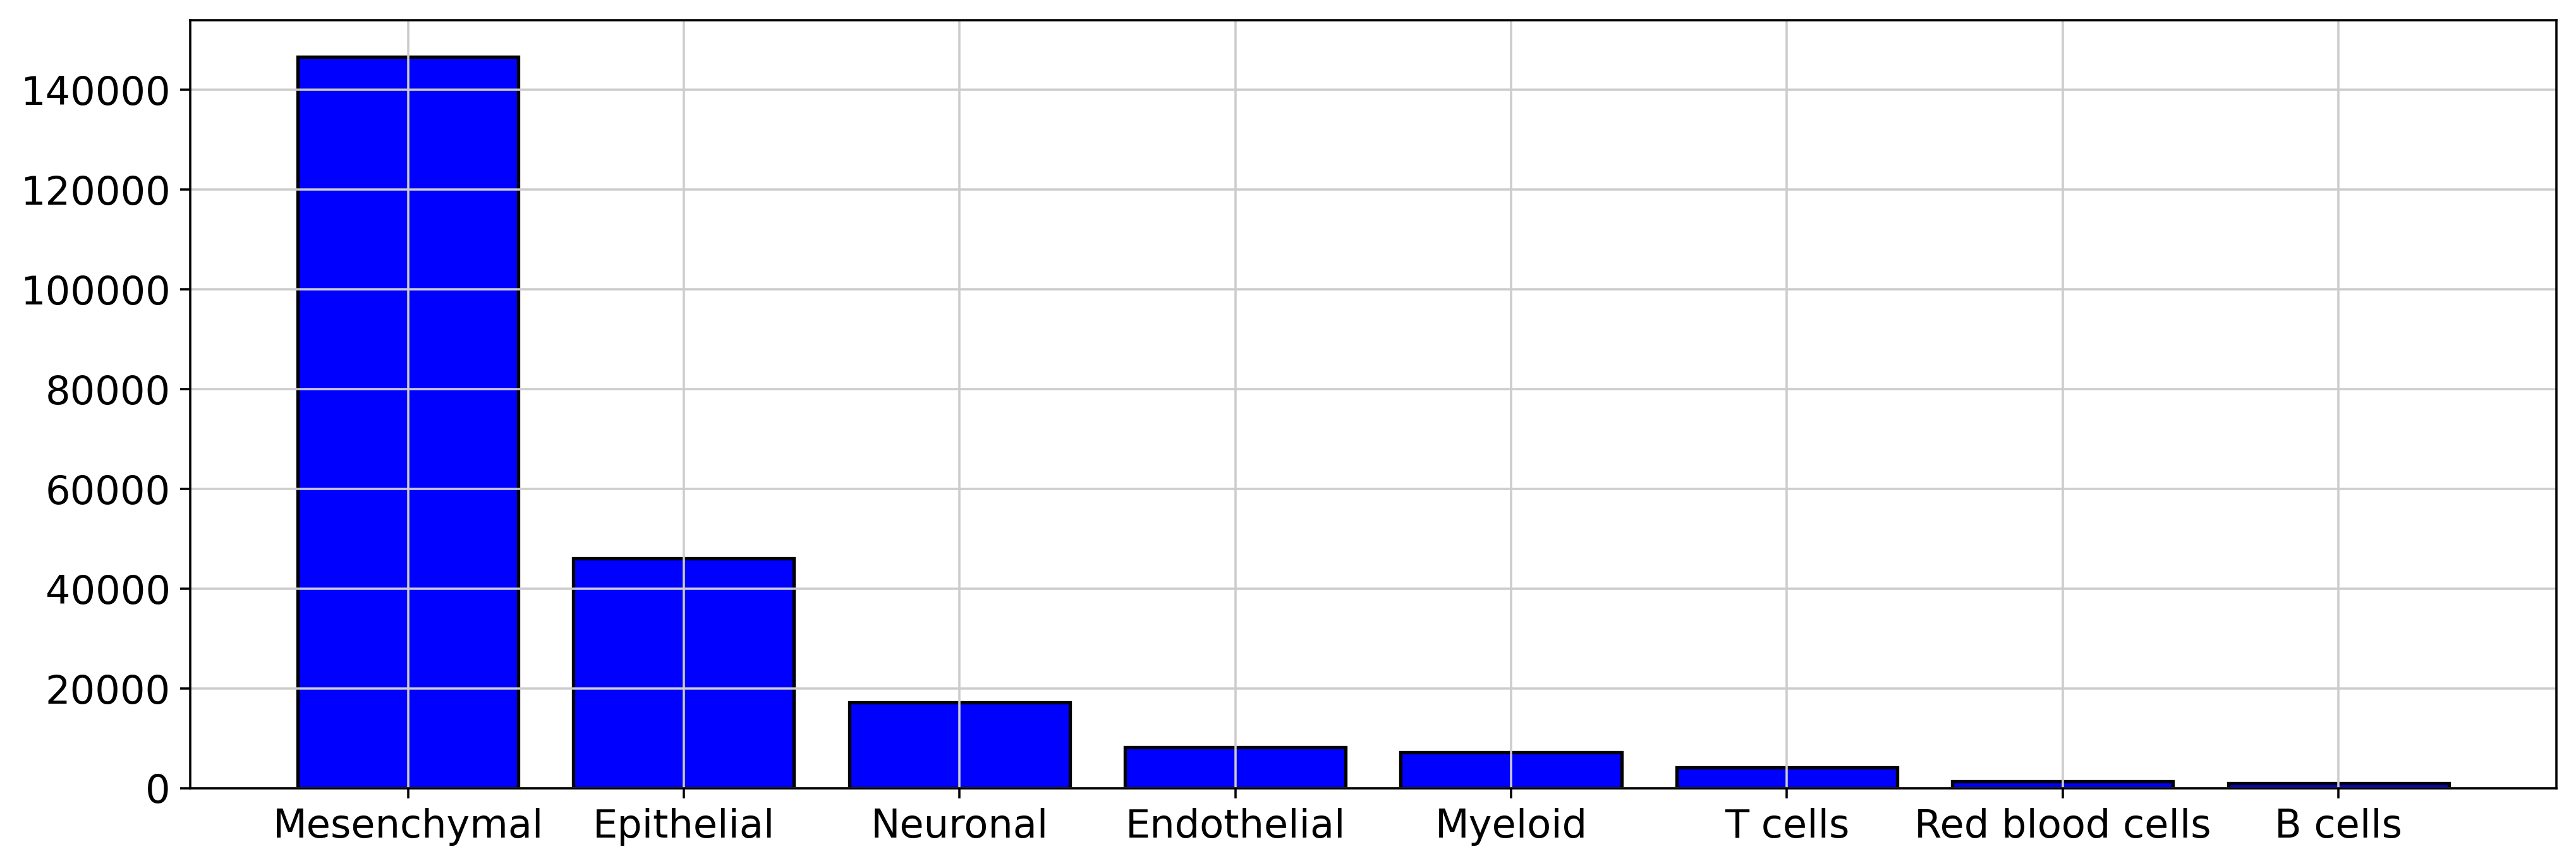

In [16]:
#Create a barplot of the number of cells per cell type in the anndata_fetal object
plt.figure(figsize = (15, 5))
plt.bar(anndata_fetal.obs["CellType"].value_counts().index, anndata_fetal.obs["CellType"].value_counts(), color = "blue", edgecolor = "black", linewidth = 1.2)

<BarContainer object of 8 artists>

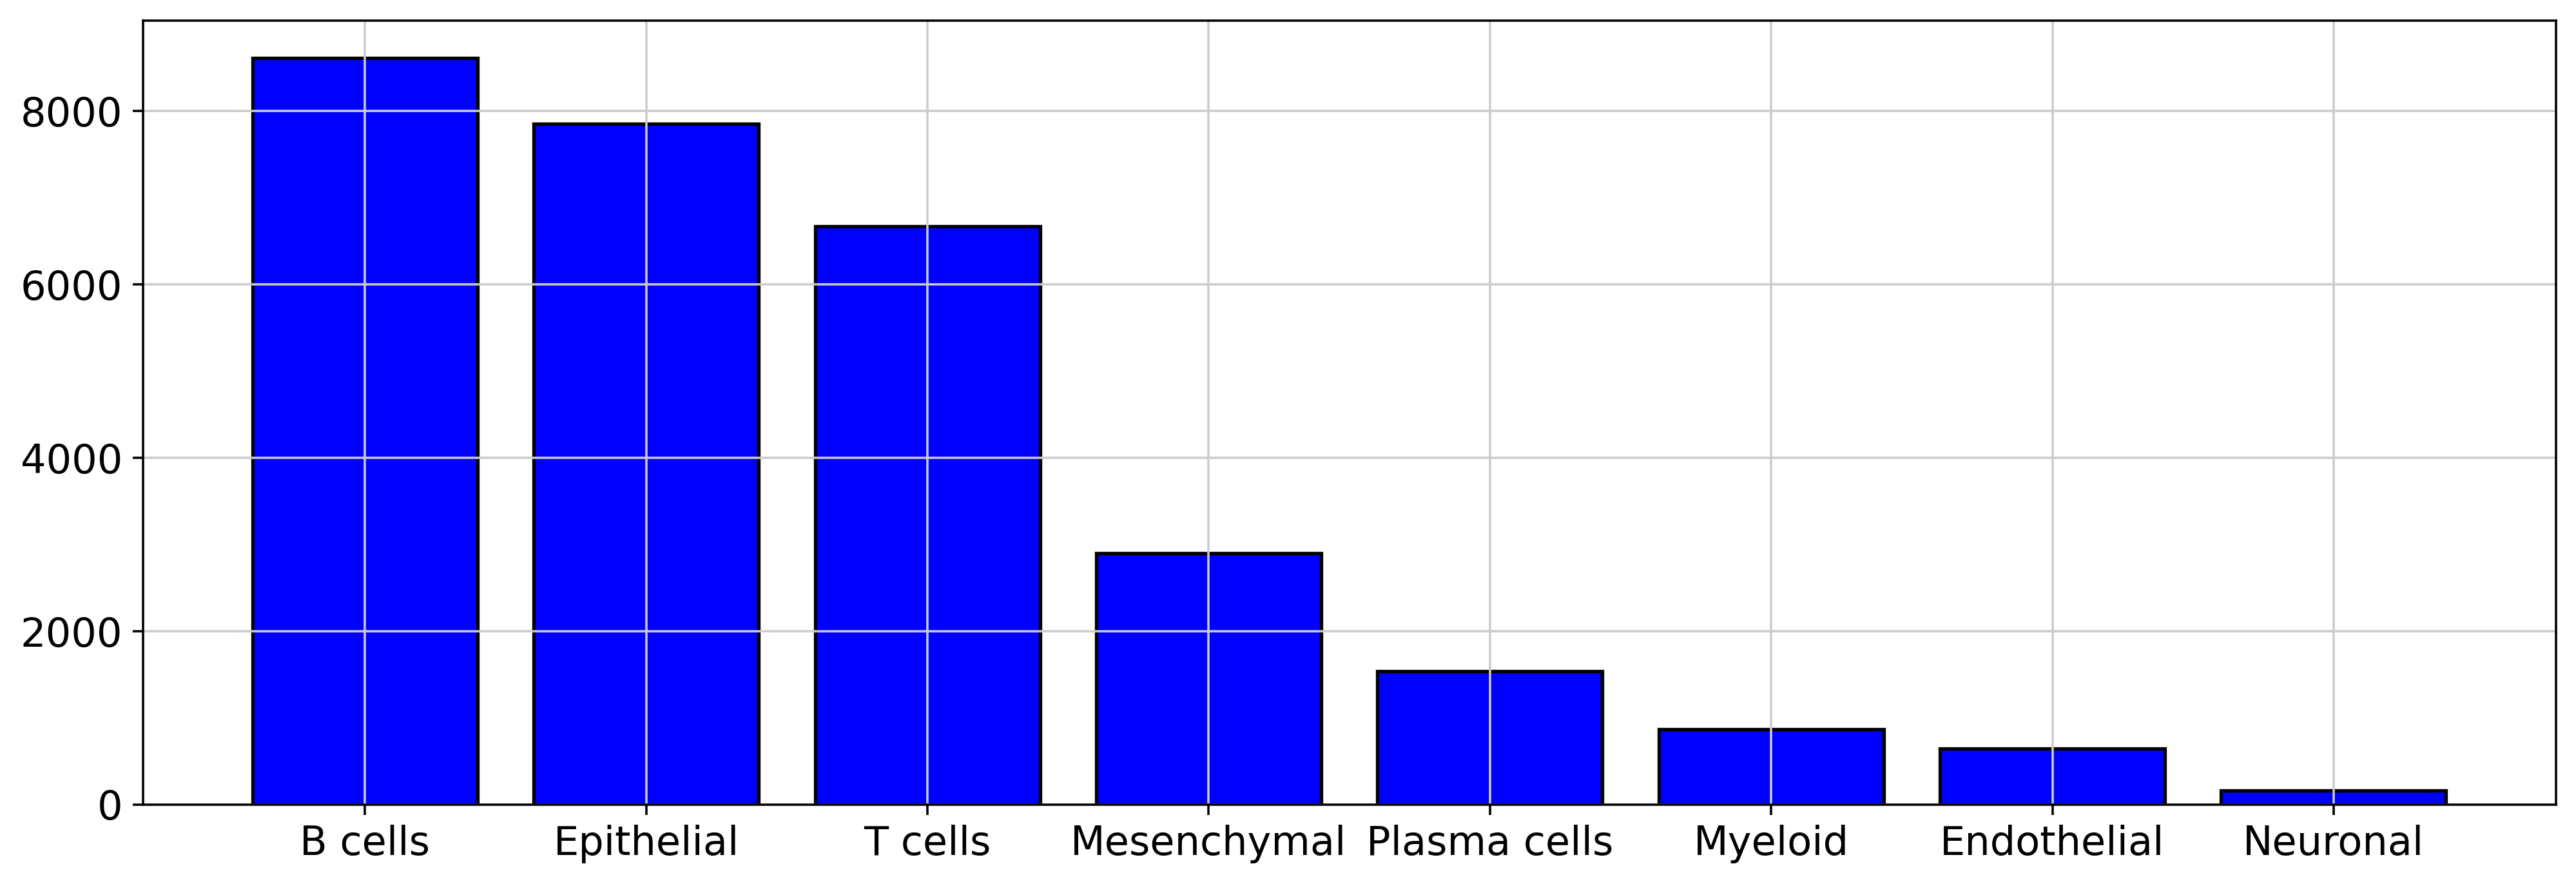

In [17]:
#Create a barplot of the number of cells per cell type in the anndata_pediatric object
plt.figure(figsize = (15, 5))
plt.bar(anndata_pediatric.obs["CellType"].value_counts().index, anndata_pediatric.obs["CellType"].value_counts(), color = "blue", edgecolor = "black", linewidth = 1.2)

### Subset data with `geosketch`

### Adult data

In [18]:
#Extract epithelial and plasma cells from the anndata_adult object
Epithelial_adult = anndata_adult[anndata_adult.obs['CellType'].isin(['Epithelial']), :]
Plasma_adult = anndata_adult[anndata_adult.obs['CellType'].isin(['Plasma cells']), :]

In [19]:
sc.pp.pca(Epithelial_adult)
sc.pp.pca(Plasma_adult)

computing PCA
    with n_comps=50
    finished (0:00:48)
computing PCA
    with n_comps=50
    finished (0:00:40)


In [35]:
N = 10000

In [36]:
sketch_index_adult_epi = gs(Epithelial_adult.obsm['X_pca'], N, replace = False)
sketch_index_adult_plasma = gs(Plasma_adult.obsm['X_pca'], N, replace = False)

In [37]:
#Subset cells according to the sketch index
subset_adult_epi = Epithelial_adult[Epithelial_adult.obs_names[sketch_index_adult_epi]]
subset_adult_plasma = Plasma_adult[Plasma_adult.obs_names[sketch_index_adult_plasma]]

In [38]:
# Drop Epithelial and Plasma cells from the anndata_adult object
anndata_adult_subset = anndata_adult[~anndata_adult.obs['CellType'].isin(['Epithelial', 'Plasma cells']), :]

In [39]:
# Concatenate the subset of adult epithelial and plasma cells with the anndata_adult object
anndata_adult_subset = ad.concat([anndata_adult_subset, subset_adult_epi, subset_adult_plasma])

<BarContainer object of 9 artists>

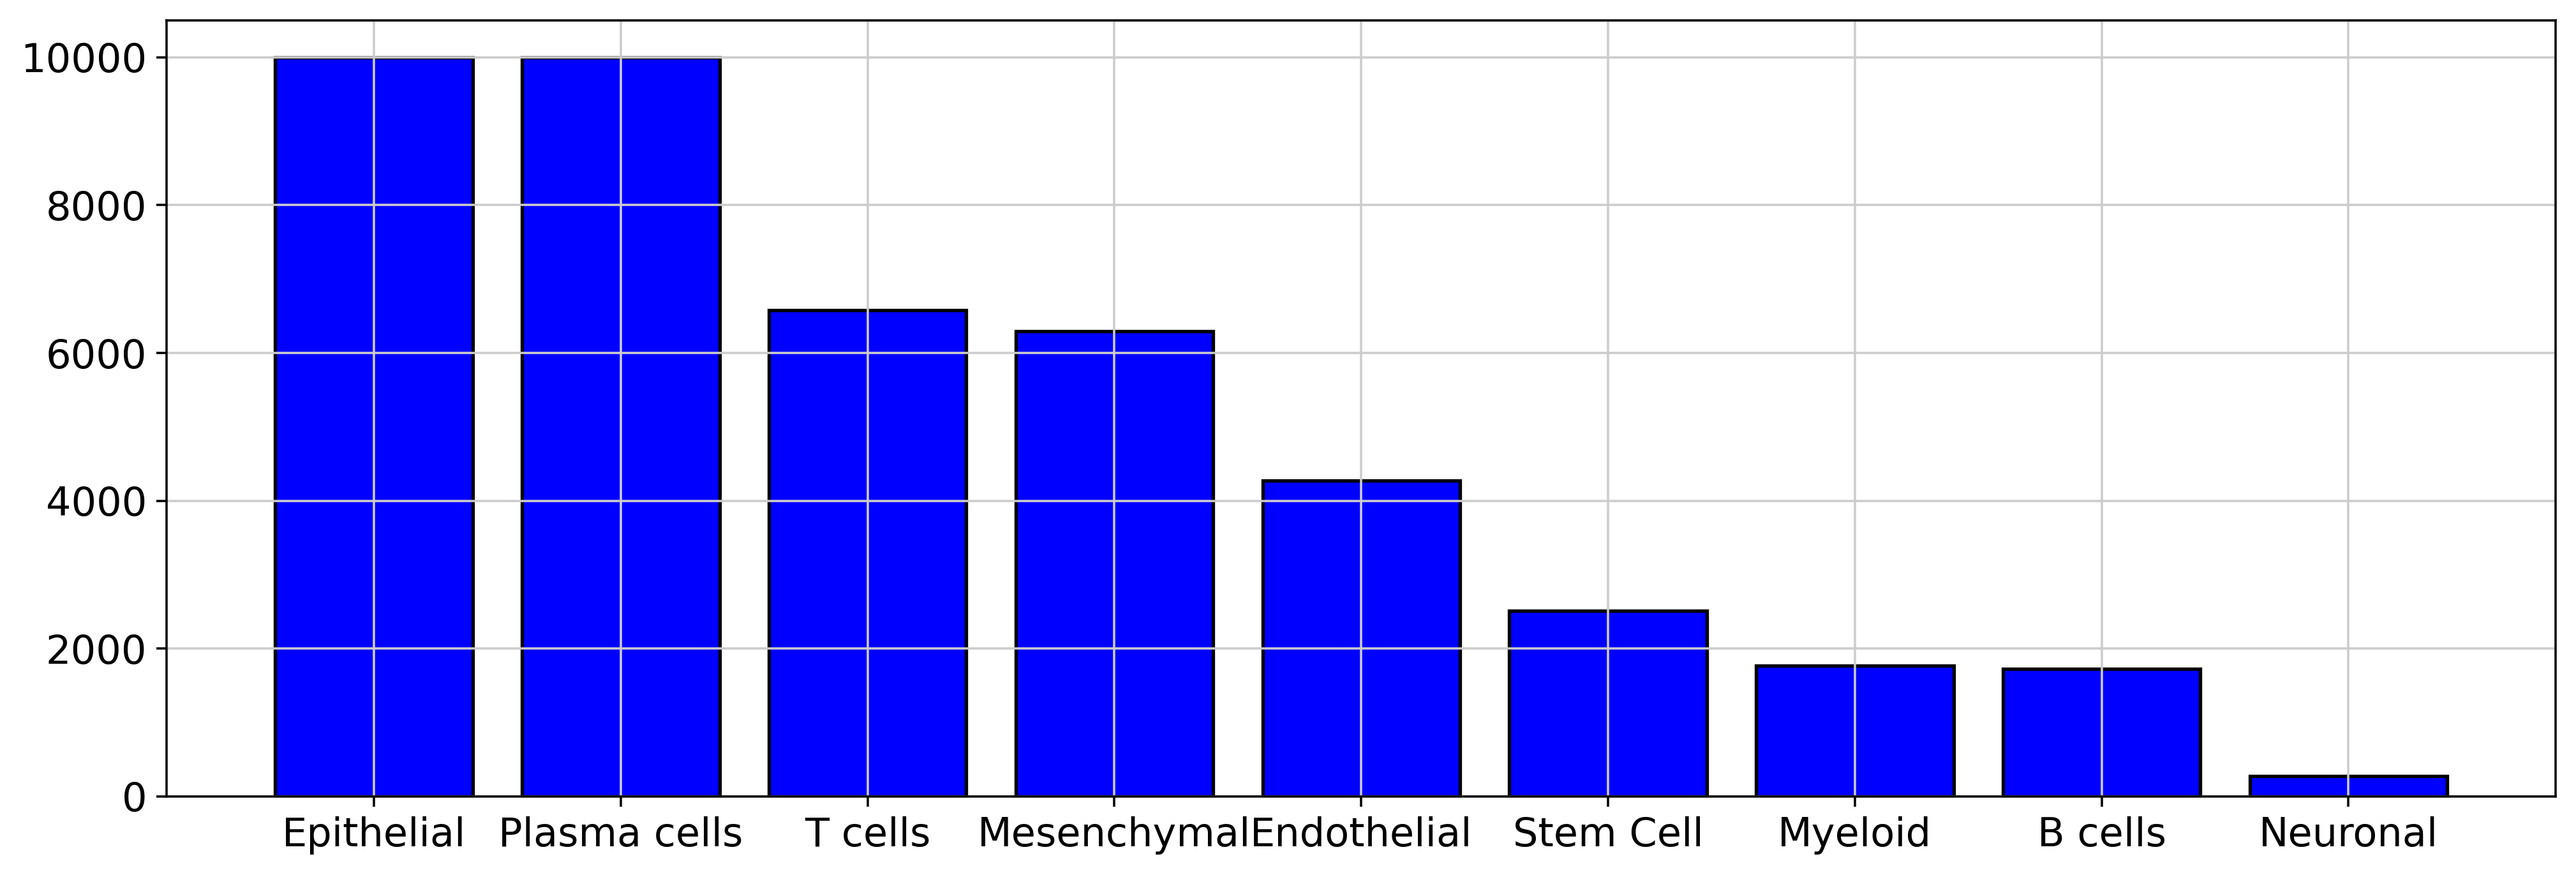

In [40]:
#Create a barplot of the number of cells per cell type in the anndata_pediatric object
plt.figure(figsize = (15, 5))
plt.bar(anndata_adult_subset.obs["CellType"].value_counts().index, anndata_adult_subset.obs["CellType"].value_counts(), color = "blue", edgecolor = "black", linewidth = 1.2)

### Fetal data

In [12]:
#Extract epithelial and mesenchymal cells from the anndata_fetal object
Epithelial_fetal = anndata_fetal[anndata_fetal.obs['CellType'].isin(['Epithelial']), :]
Mesenchymal_fetal = anndata_fetal[anndata_fetal.obs['CellType'].isin(['Mesenchymal']), :]
Neuronal_fetal = anndata_fetal[anndata_fetal.obs['CellType'].isin(['Neuronal']), :]

In [13]:
sc.pp.pca(Epithelial_fetal)
sc.pp.pca(Mesenchymal_fetal)
sc.pp.pca(Neuronal_fetal)

computing PCA
    with n_comps=50
    finished (0:00:41)
computing PCA
    with n_comps=50
    finished (0:01:45)
computing PCA
    with n_comps=50
    finished (0:00:35)


In [14]:
N = 10000

In [15]:
sketch_index_fetal_epi = gs(Epithelial_fetal.obsm['X_pca'], N, replace = False)
sketch_index_fetal_mes = gs(Mesenchymal_fetal.obsm['X_pca'], N, replace = False)
sketch_index_fetal_neur = gs(Neuronal_fetal.obsm['X_pca'], N, replace = False)

In [16]:
#Subset cells according to the sketch index
subset_fetal_epi = Epithelial_fetal[Epithelial_fetal.obs_names[sketch_index_fetal_epi]]
subset_fetal_mes = Mesenchymal_fetal[Mesenchymal_fetal.obs_names[sketch_index_fetal_mes]]
subset_fetal_neur = Neuronal_fetal[Neuronal_fetal.obs_names[sketch_index_fetal_neur]]

In [17]:
# Drop Epithelial, Mesenchymal and Neuronal cells from the anndata_adult object
anndata_fetal_subset = anndata_fetal[~anndata_fetal.obs['CellType'].isin(['Epithelial', 'Mesenchymal', 'Neuronal']), :]

In [18]:
# Concatenate the subset of adult epithelial and plasma cells with the anndata_adult object
anndata_fetal_subset = ad.concat([anndata_fetal_subset, subset_fetal_epi, subset_fetal_mes, subset_fetal_neur])

<BarContainer object of 8 artists>

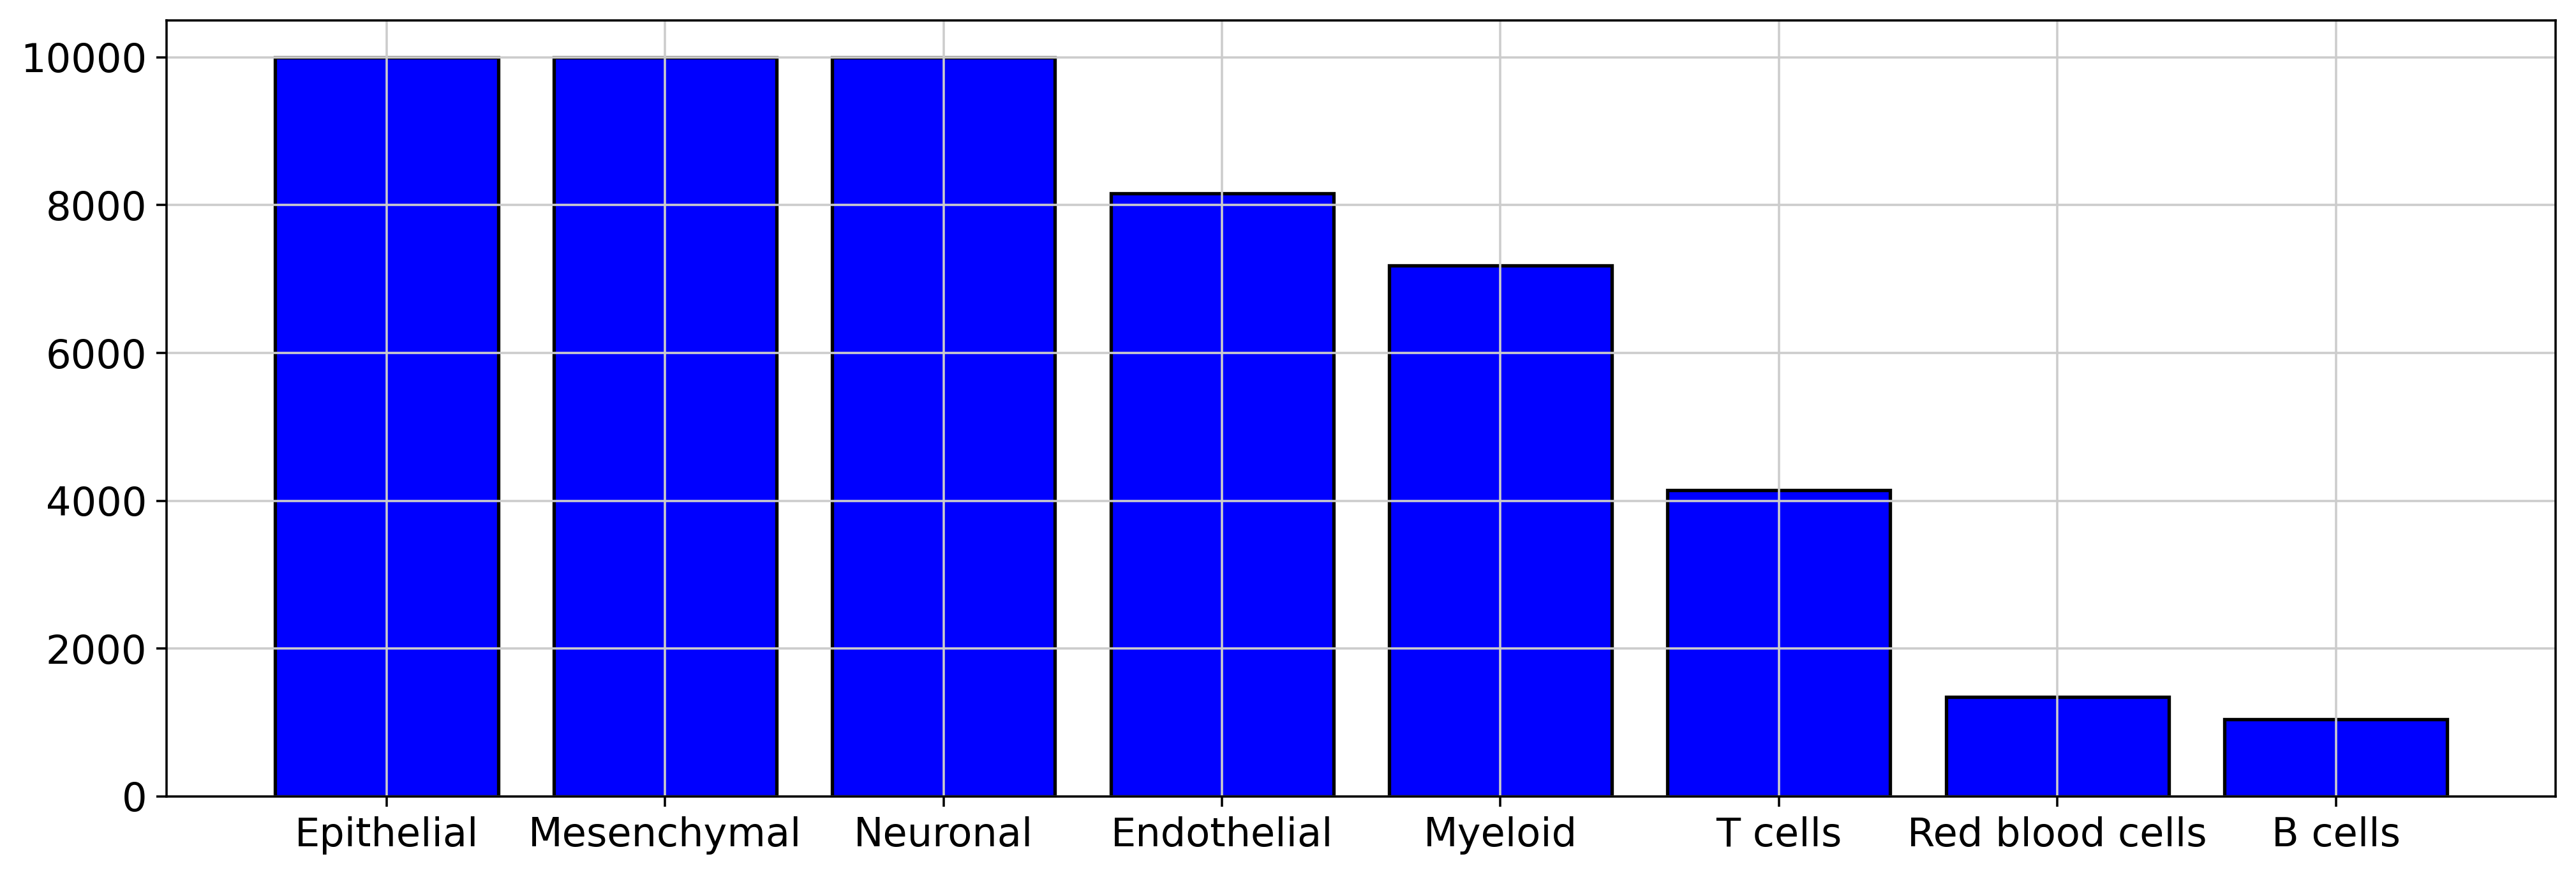

In [19]:
#Create a barplot of the number of cells per cell type in the anndata_pediatric object
plt.figure(figsize = (15, 5))
plt.bar(anndata_fetal_subset.obs["CellType"].value_counts().index, anndata_fetal_subset.obs["CellType"].value_counts(), color = "blue", edgecolor = "black", linewidth = 1.2)

In [20]:
del subset_fetal_epi, subset_fetal_mes, subset_fetal_neur, Epithelial_fetal, Mesenchymal_fetal, Neuronal_fetal

## Concatenate all files into reference object and write the file

In [49]:
# Concatenate anndata_adult_subset, with anndata_fetal_subset and anndata_pediatric
anndata_subset = ad.concat([anndata_adult_subset, anndata_fetal_subset, anndata_pediatric])

<BarContainer object of 10 artists>

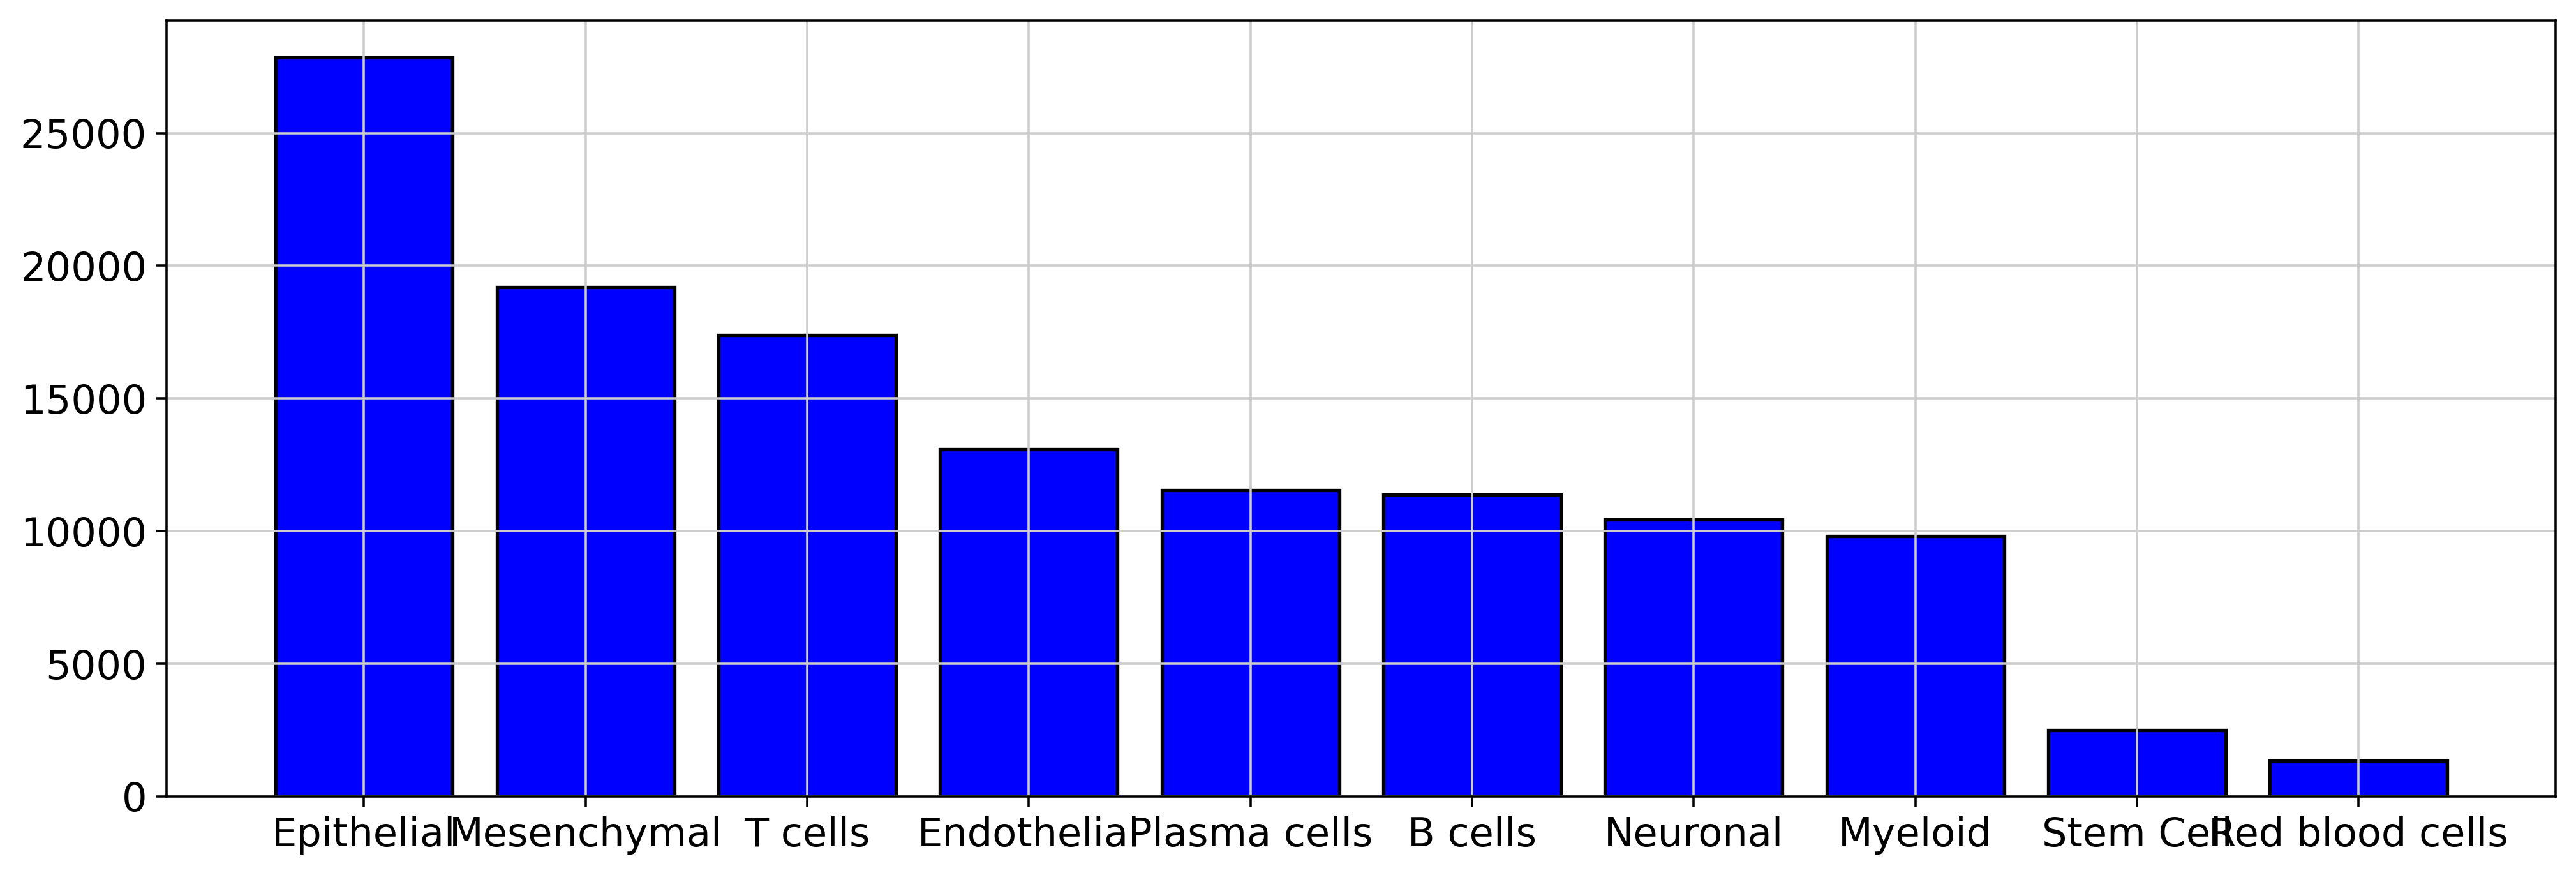

In [50]:
#Create a barplot of the number of cells per cell type in the anndata_pediatric object
plt.figure(figsize = (15, 5))
plt.bar(anndata_subset.obs["CellType"].value_counts().index, anndata_subset.obs["CellType"].value_counts(), color = "blue", edgecolor = "black", linewidth = 1.2)

In [51]:
#Save the anndata_subset object
anndata_subset.write('/lustre/groups/talaveralopez/workspace/anna.maguza/Processed_datasets/expi_map/Reference_map_subset_after_geosketch.h5ad')

### Preparing query object

In [52]:
#Drop the anndata_subset object from the anndata object 
query_object = anndata[~anndata.obs_names.isin(anndata_subset.obs_names), :]

In [53]:
query_object.obs

,UniqueCell_ID,Sample_ID,CellType,Study_name,Diagnosis,Age,Region code,Fraction,Gender,10X,...,doublet_scores,predicted_doublets,Age_group,Integrated_05,total_counts_ribo,Location,n_counts,percent_mito,percent_ribo,Subject
cell_id,,,,,,,,,,,,,,,,,,,,,
AACACGTTCCTGCAGG-1-Human_colon_16S8000511,nan,A32-SCL-0-SC-45N-1,Epithelial,Gut Cell Atlas,Healthy adult,25-30,SCL,SC-45N,M,5',...,0.09615384615384616,False,Adult,TA,300.0,LargeInt,6295.0,32.058834,4.765687,A32 (411C)
AACGTTGTCGGGAGTA-1-Human_colon_16S8000511,nan,A32-SCL-0-SC-45N-1,Epithelial,Gut Cell Atlas,Healthy adult,25-30,SCL,SC-45N,M,5',...,0.015003572279114075,False,Adult,TA,265.0,LargeInt,1070.0,0.5920313,24.766356,A32 (411C)
AACTCTTGTTAAGAAC-1-Human_colon_16S8000511,nan,A32-SCL-0-SC-45N-1,Plasma cells,Gut Cell Atlas,Healthy adult,25-30,SCL,SC-45N,M,5',...,0.016066212268743916,False,Adult,IgA plasma cell,21.0,LargeInt,1416.0,39.09398,1.4830508,A32 (411C)
AACTGGTCAGACGTAG-1-Human_colon_16S8000511,nan,A32-SCL-0-SC-45N-1,Plasma cells,Gut Cell Atlas,Healthy adult,25-30,SCL,SC-45N,M,5',...,0.0079155672823219,False,Adult,IgA plasma cell,31.0,LargeInt,1528.0,25.19317,2.028796,A32 (411C)
ACACCAACAAGGACTG-1-Human_colon_16S8000511,nan,A32-SCL-0-SC-45N-1,Plasma cells,Gut Cell Atlas,Healthy adult,25-30,SCL,SC-45N,M,5',...,0.011176857330703486,False,Adult,IgA plasma cell,15.0,LargeInt,1654.0,22.860184,0.9068924,A32 (411C)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTACTGCATATACGC-1-WTDAtest7770719,nan,A30-SCL-6-SC-45N-2,Epithelial,Gut Cell Atlas,Healthy adult,20-25,SCL,SC-45N,F,3',...,0.036417588346371724,False,Adult,Colonocyte,97.0,LargeInt,5098.0,35.592136,1.9027069,A30 (398B)
TTTACTGGTGTGACGA-1-WTDAtest7770719,nan,A30-SCL-6-SC-45N-2,Epithelial,Gut Cell Atlas,Healthy adult,20-25,SCL,SC-45N,F,3',...,0.036417588346371724,False,Adult,Colonocyte,120.0,LargeInt,5012.0,46.26234,2.3942537,A30 (398B)
TTTACTGTCGGCTACG-1-WTDAtest7770719,nan,A30-SCL-6-SC-45N-2,Epithelial,Gut Cell Atlas,Healthy adult,20-25,SCL,SC-45N,F,3',...,0.050814332247557006,False,Adult,Colonocyte,118.0,LargeInt,5321.0,36.654896,2.2176282,A30 (398B)


<BarContainer object of 4 artists>

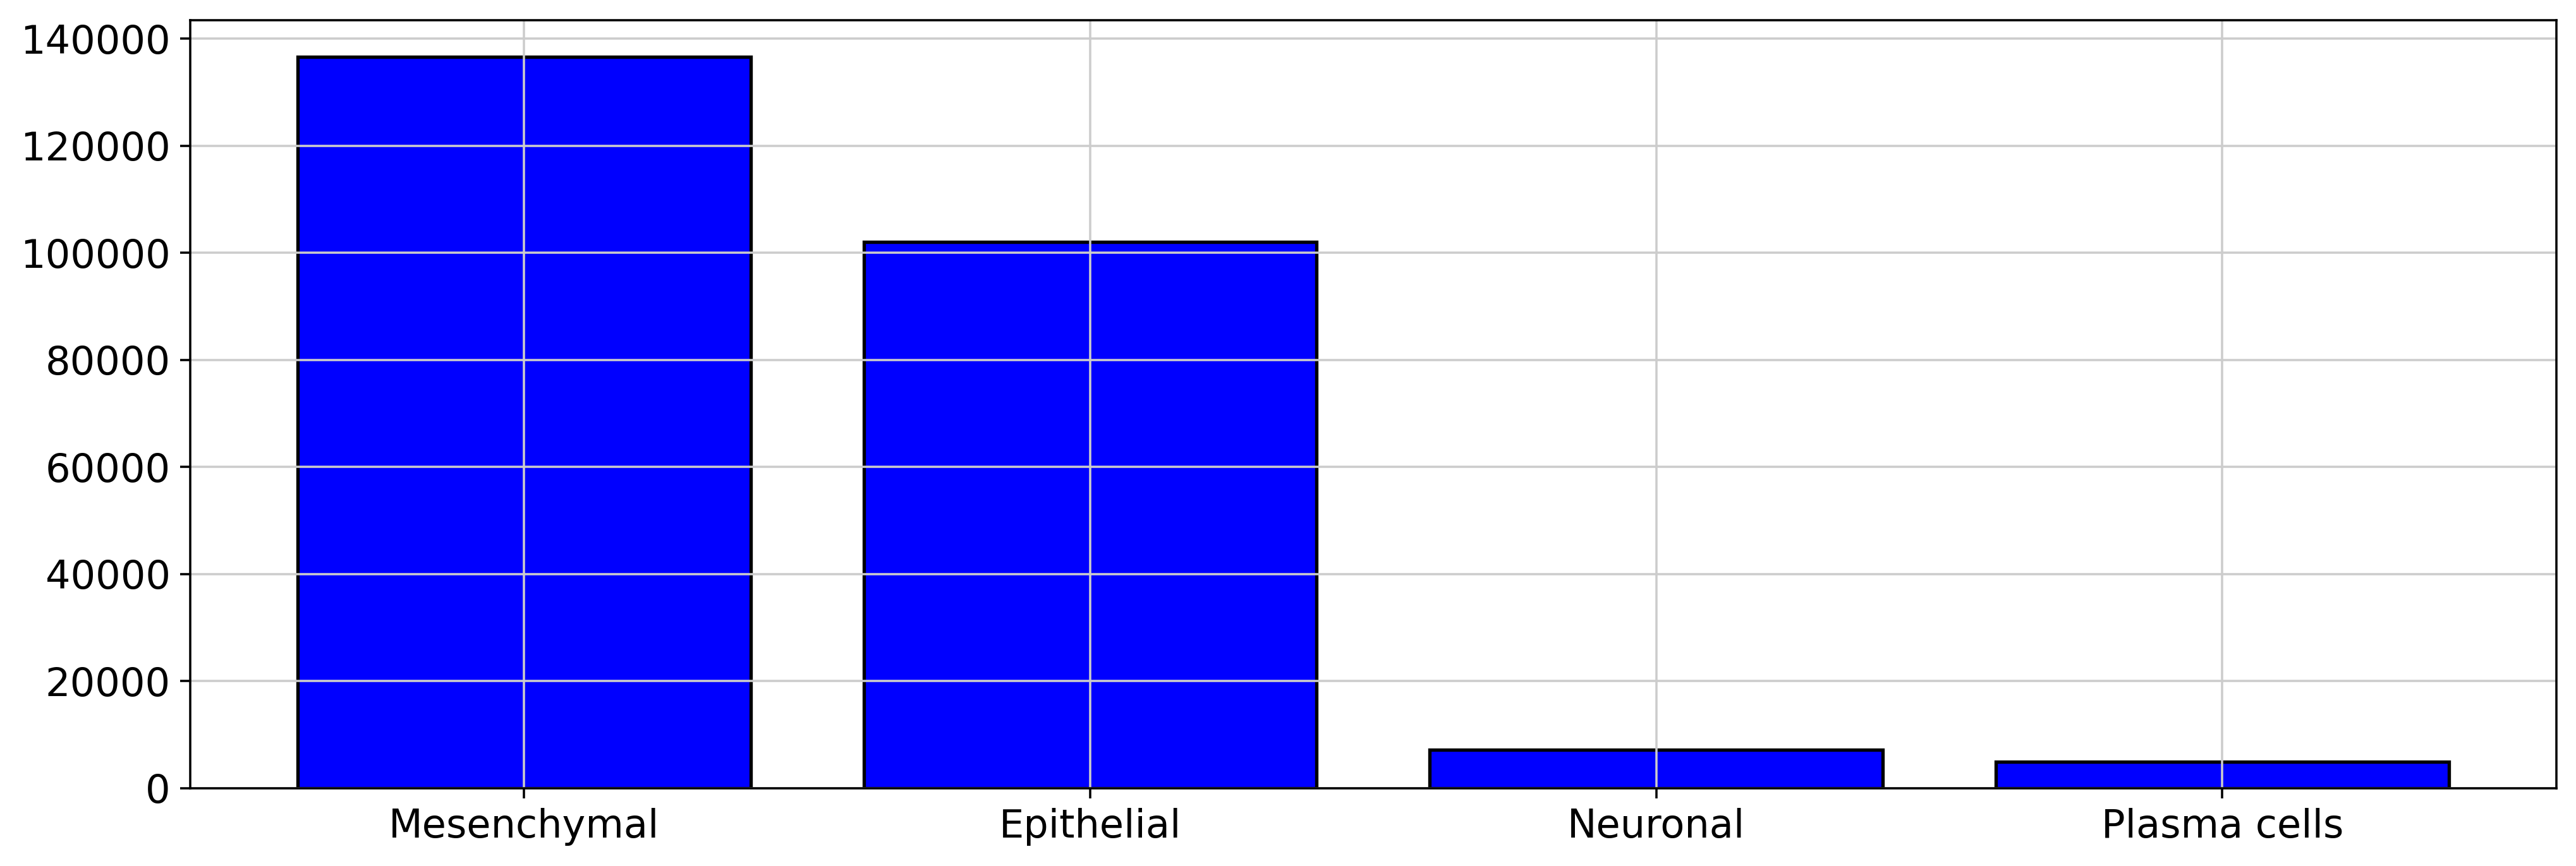

In [54]:
#Create a barplot of the number of cells per cell type in the anndata_pediatric object
plt.figure(figsize = (15, 5))
plt.bar(query_object.obs["CellType"].value_counts().index, query_object.obs["CellType"].value_counts(), color = "blue", edgecolor = "black", linewidth = 1.2)

In [55]:
#Save the query_object object
query_object.write('/lustre/groups/talaveralopez/workspace/anna.maguza/Processed_datasets/expi_map/Query_map_after_geosketch.h5ad')

## Preparing new reference with less plasma cells

In [21]:
#Extract epithelial and plasma cells from the anndata_adult object
Epithelial_adult = anndata_adult[anndata_adult.obs['CellType'].isin(['Epithelial']), :]
Plasma_adult = anndata_adult[anndata_adult.obs['CellType'].isin(['Plasma cells']), :]

In [22]:
sc.pp.pca(Epithelial_adult)
sc.pp.pca(Plasma_adult)

computing PCA
    with n_comps=50
    finished (0:00:34)
computing PCA
    with n_comps=50
    finished (0:00:25)


In [23]:
sketch_index_adult_epi = gs(Epithelial_adult.obsm['X_pca'], 10000, replace = False)
sketch_index_adult_plasma = gs(Plasma_adult.obsm['X_pca'], 2000, replace = False)

In [24]:
#Subset cells according to the sketch index
subset_adult_epi = Epithelial_adult[Epithelial_adult.obs_names[sketch_index_adult_epi]]
subset_adult_plasma = Plasma_adult[Plasma_adult.obs_names[sketch_index_adult_plasma]]

In [25]:
# Drop Epithelial and Plasma cells from the anndata_adult object
anndata_adult_subset = anndata_adult[~anndata_adult.obs['CellType'].isin(['Epithelial', 'Plasma cells']), :]

In [26]:
# Concatenate the subset of adult epithelial and plasma cells with the anndata_adult object
anndata_adult_subset = ad.concat([anndata_adult_subset, subset_adult_epi, subset_adult_plasma])

<BarContainer object of 9 artists>

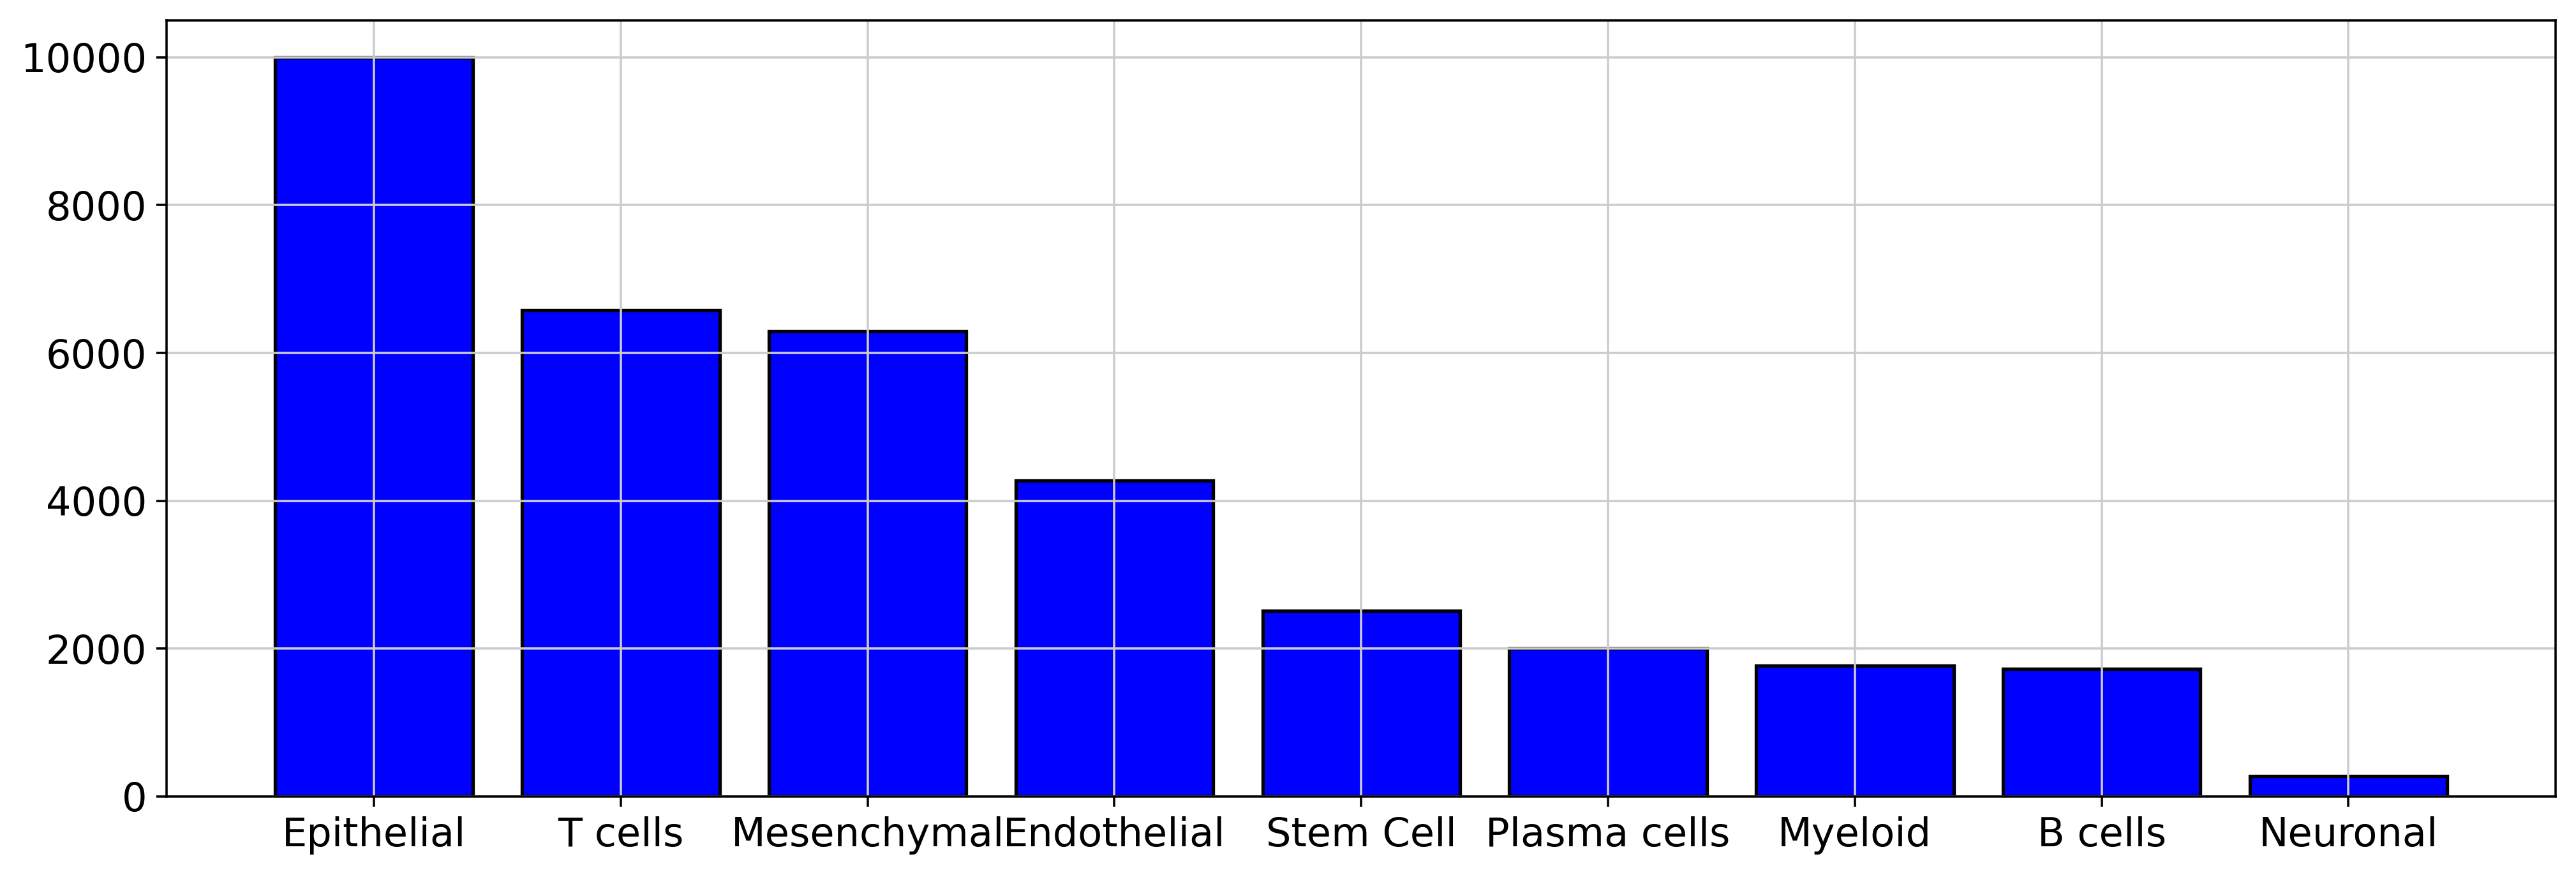

In [27]:
#Create a barplot of the number of cells per cell type in the anndata_pediatric object
plt.figure(figsize = (15, 5))
plt.bar(anndata_adult_subset.obs["CellType"].value_counts().index, anndata_adult_subset.obs["CellType"].value_counts(), color = "blue", edgecolor = "black", linewidth = 1.2)

In [28]:
del subset_adult_epi, subset_adult_plasma, Epithelial_adult, Plasma_adult

## Concatenate new reference object

In [29]:
# Concatenate anndata_adult_subset, with anndata_fetal_subset and anndata_pediatric
anndata_subset = ad.concat([anndata_adult_subset, anndata_fetal_subset, anndata_pediatric])

In [30]:
del anndata_adult_subset, anndata_fetal_subset, anndata_pediatric

<BarContainer object of 10 artists>

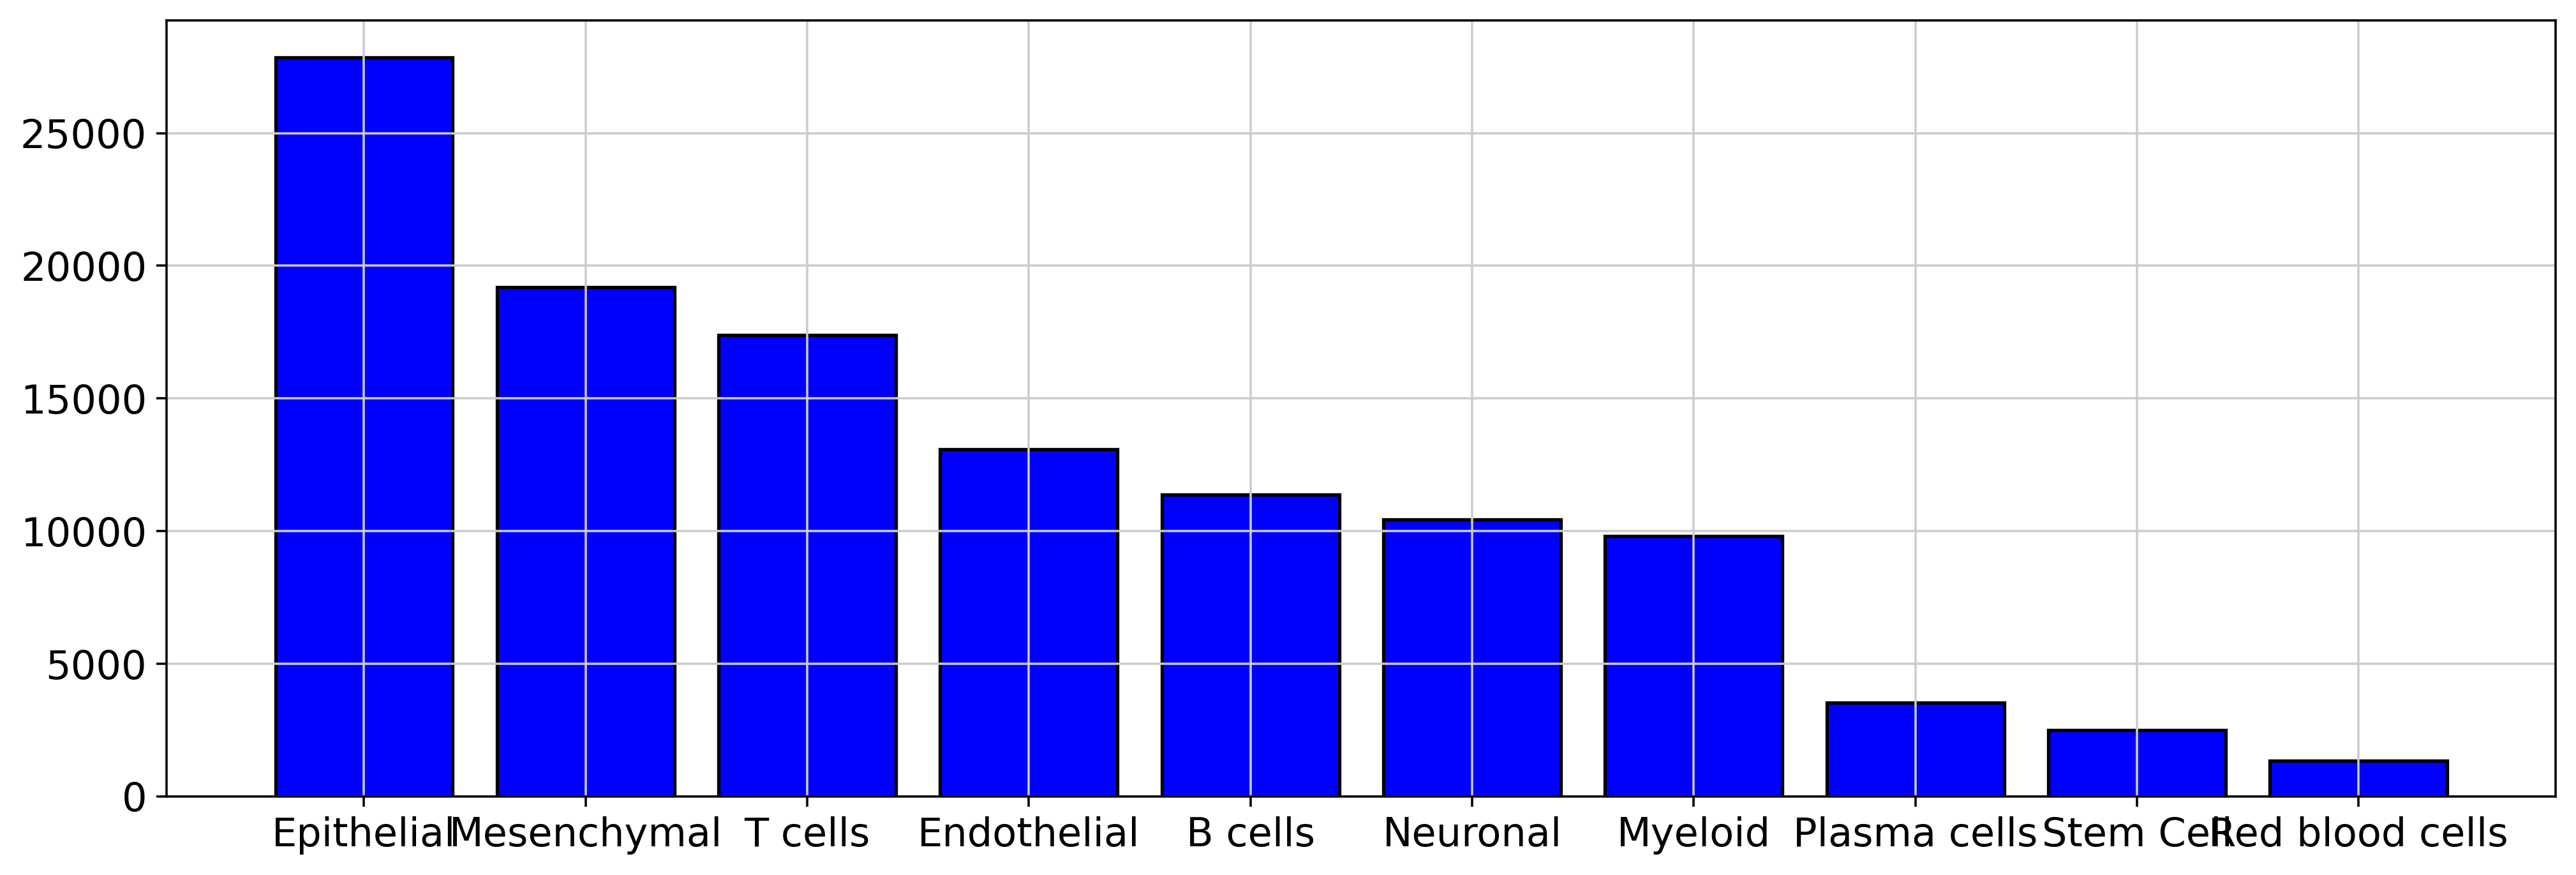

In [31]:
#Create a barplot of the number of cells per cell type in the anndata_pediatric object
plt.figure(figsize = (15, 5))
plt.bar(anndata_subset.obs["CellType"].value_counts().index, anndata_subset.obs["CellType"].value_counts(), color = "blue", edgecolor = "black", linewidth = 1.2)

In [32]:
#Save the anndata_subset object
anndata_subset.write('/lustre/groups/talaveralopez/workspace/anna.maguza/Processed_datasets/expi_map/Reference_map_subset_after_geosketch2_less_plasma.h5ad')

## Preparing new query object (changed plasma cells number)

In [33]:
#Drop the anndata_subset object from the anndata object 
query_object = anndata[~anndata.obs_names.isin(anndata_subset.obs_names), :]

<BarContainer object of 4 artists>

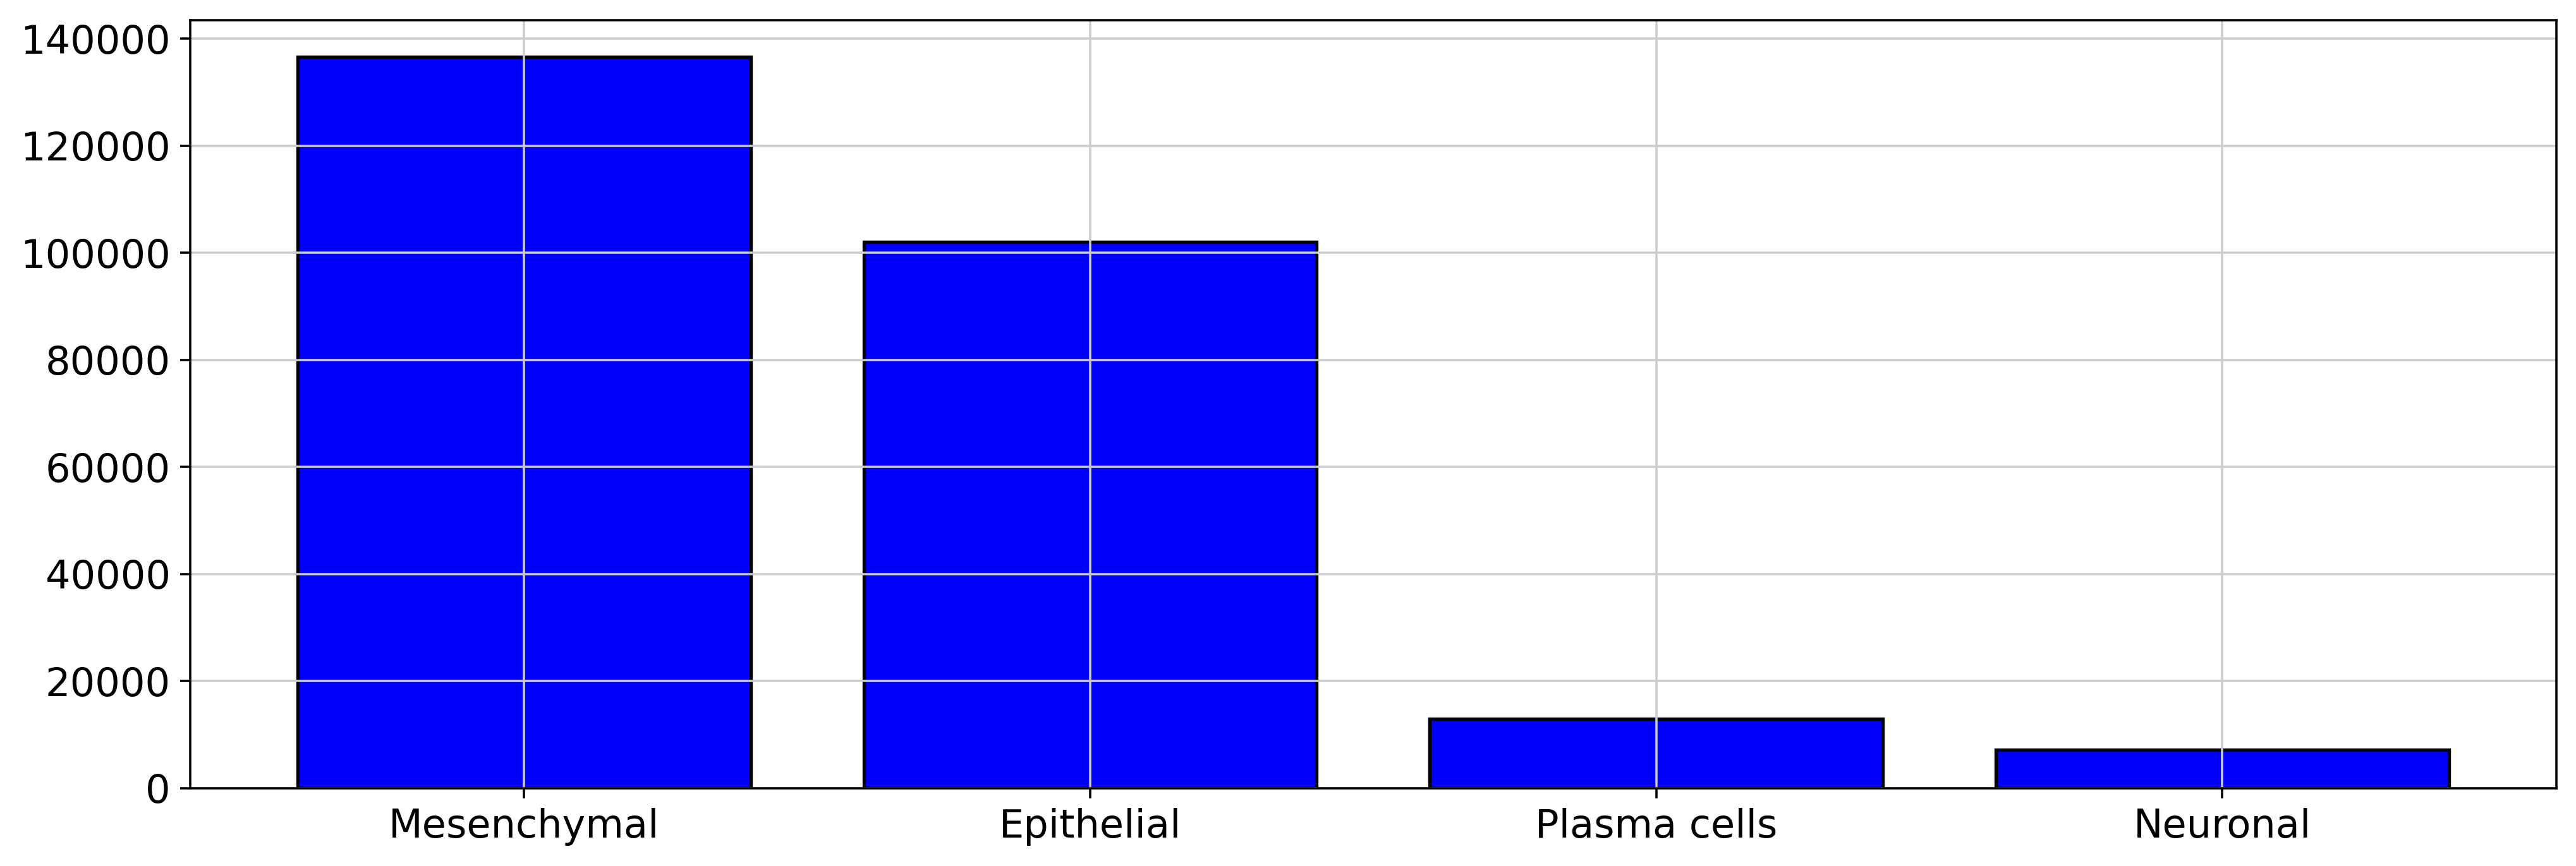

In [34]:
#Create a barplot of the number of cells per cell type in the anndata_pediatric object
plt.figure(figsize = (15, 5))
plt.bar(query_object.obs["CellType"].value_counts().index, query_object.obs["CellType"].value_counts(), color = "blue", edgecolor = "black", linewidth = 1.2)

In [35]:
#Save the query_object object
query_object.write('/lustre/groups/talaveralopez/workspace/anna.maguza/Processed_datasets/expi_map/Query_map_after_geosketch2_less_plasma.h5ad')